<a href="https://colab.research.google.com/github/rushikeshnaik779/EDA/blob/master/EDA_for_kaggle_survey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [13]:
import os 
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [14]:
%cd /content/gdrive/MyDrive/Kaggle


/content/gdrive/MyDrive/Kaggle


In [15]:
#!kaggle competitions download -c kaggle-survey-2020

In [16]:
!unzip \*.zip && rm *.zip


unzip:  cannot find or open *.zip, *.zip.zip or *.zip.ZIP.

No zipfiles found.


In [17]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
data=pd.read_csv('./kaggle_survey_2020_responses.csv')
data.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,...,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_Part_10,Q31_B_Part_11,Q31_B_Part_12,Q31_B_Part_13,Q31_B_Part_14,Q31_B_OTHER,Q33_B_Part_1,Q33_B_Part_2,Q33_B_Part_3,Q33_B_Part_4,Q33_B_Part_5,Q33_B_Part_6,Q33_B_Part_7,Q33_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_OTHER,Q35_B_Part_1,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming language would you recommend ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool.

In [19]:
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec 

from matplotlib.offsetbox import AnchoredText
from mpl_toolkits.axes_grid1 import make_axes_locatable

import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
plt.rcParams['figure.dpi'] = 200 #high resolution

In [20]:
questions = data.iloc[0, :].T
data = data.iloc[1:, :]

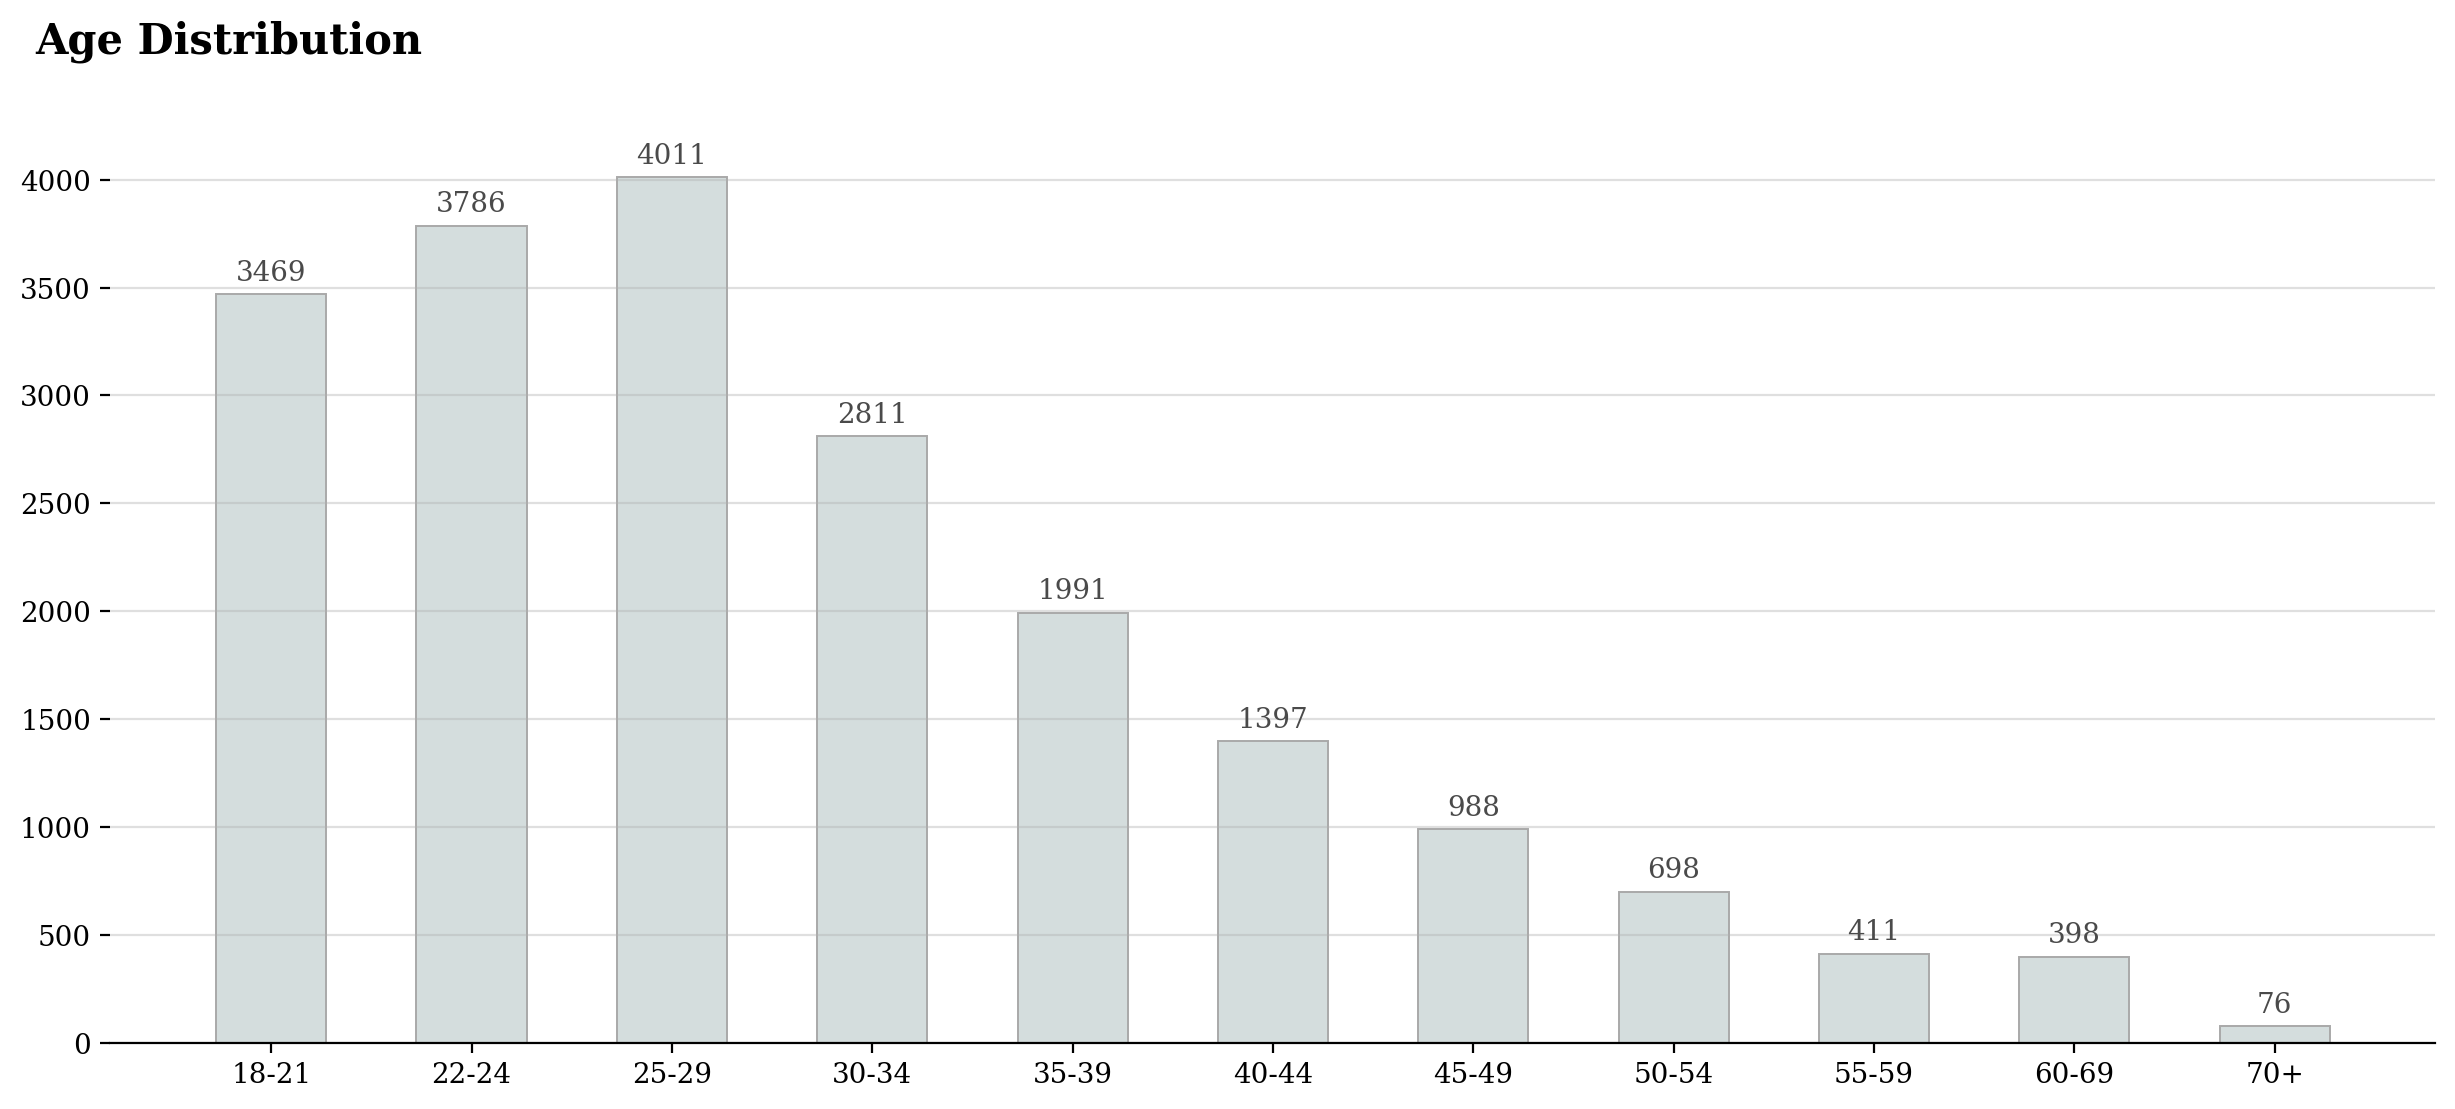

In [21]:
fig, ax = plt.subplots(1,1, figsize=(15, 6))
data_q1 = data['Q1'].value_counts().sort_index()
ax.bar(data_q1.index, data_q1, width=0.55, edgecolor='darkgray', color='#d4dddd', linewidth=0.7)


for i in data_q1.index:
  ax.annotate(f"{data_q1[i]}", 
              xy = (i, data_q1[i] + 100),
              va='center', 
              ha='center', 
              fontweight='light',
              fontfamily='serif',
              color='#4a4a4a')
  

for s in ['top', 'left', 'right']:
  ax.spines[s].set_visible(False)
ax.set_ylim(0, 4200)
ax.set_xticklabels(data_q1.index, fontfamily='serif')
ax.set_yticklabels(np.arange(0, 4001, 500), fontfamily='serif')
fig.text(0.1, 0.95, 'Age Distribution', fontsize=15, fontweight='bold', fontfamily='serif')
ax.grid(axis='y', linestyle='-', alpha=0.4)
plt.show()

Q1     18-21  22-24  25-29  30-34  35-39  ...  45-49  50-54  55-59  60-69  70+
Q2                                        ...                                 
Man     2611   2838   3128   2246   1581  ...    840    605    353    362   72
Woman    796    886    819    504    368  ...    126     81     45     29    2

[2 rows x 11 columns]


Text(0.16, 0.95, 'Age/Gender Distribution')

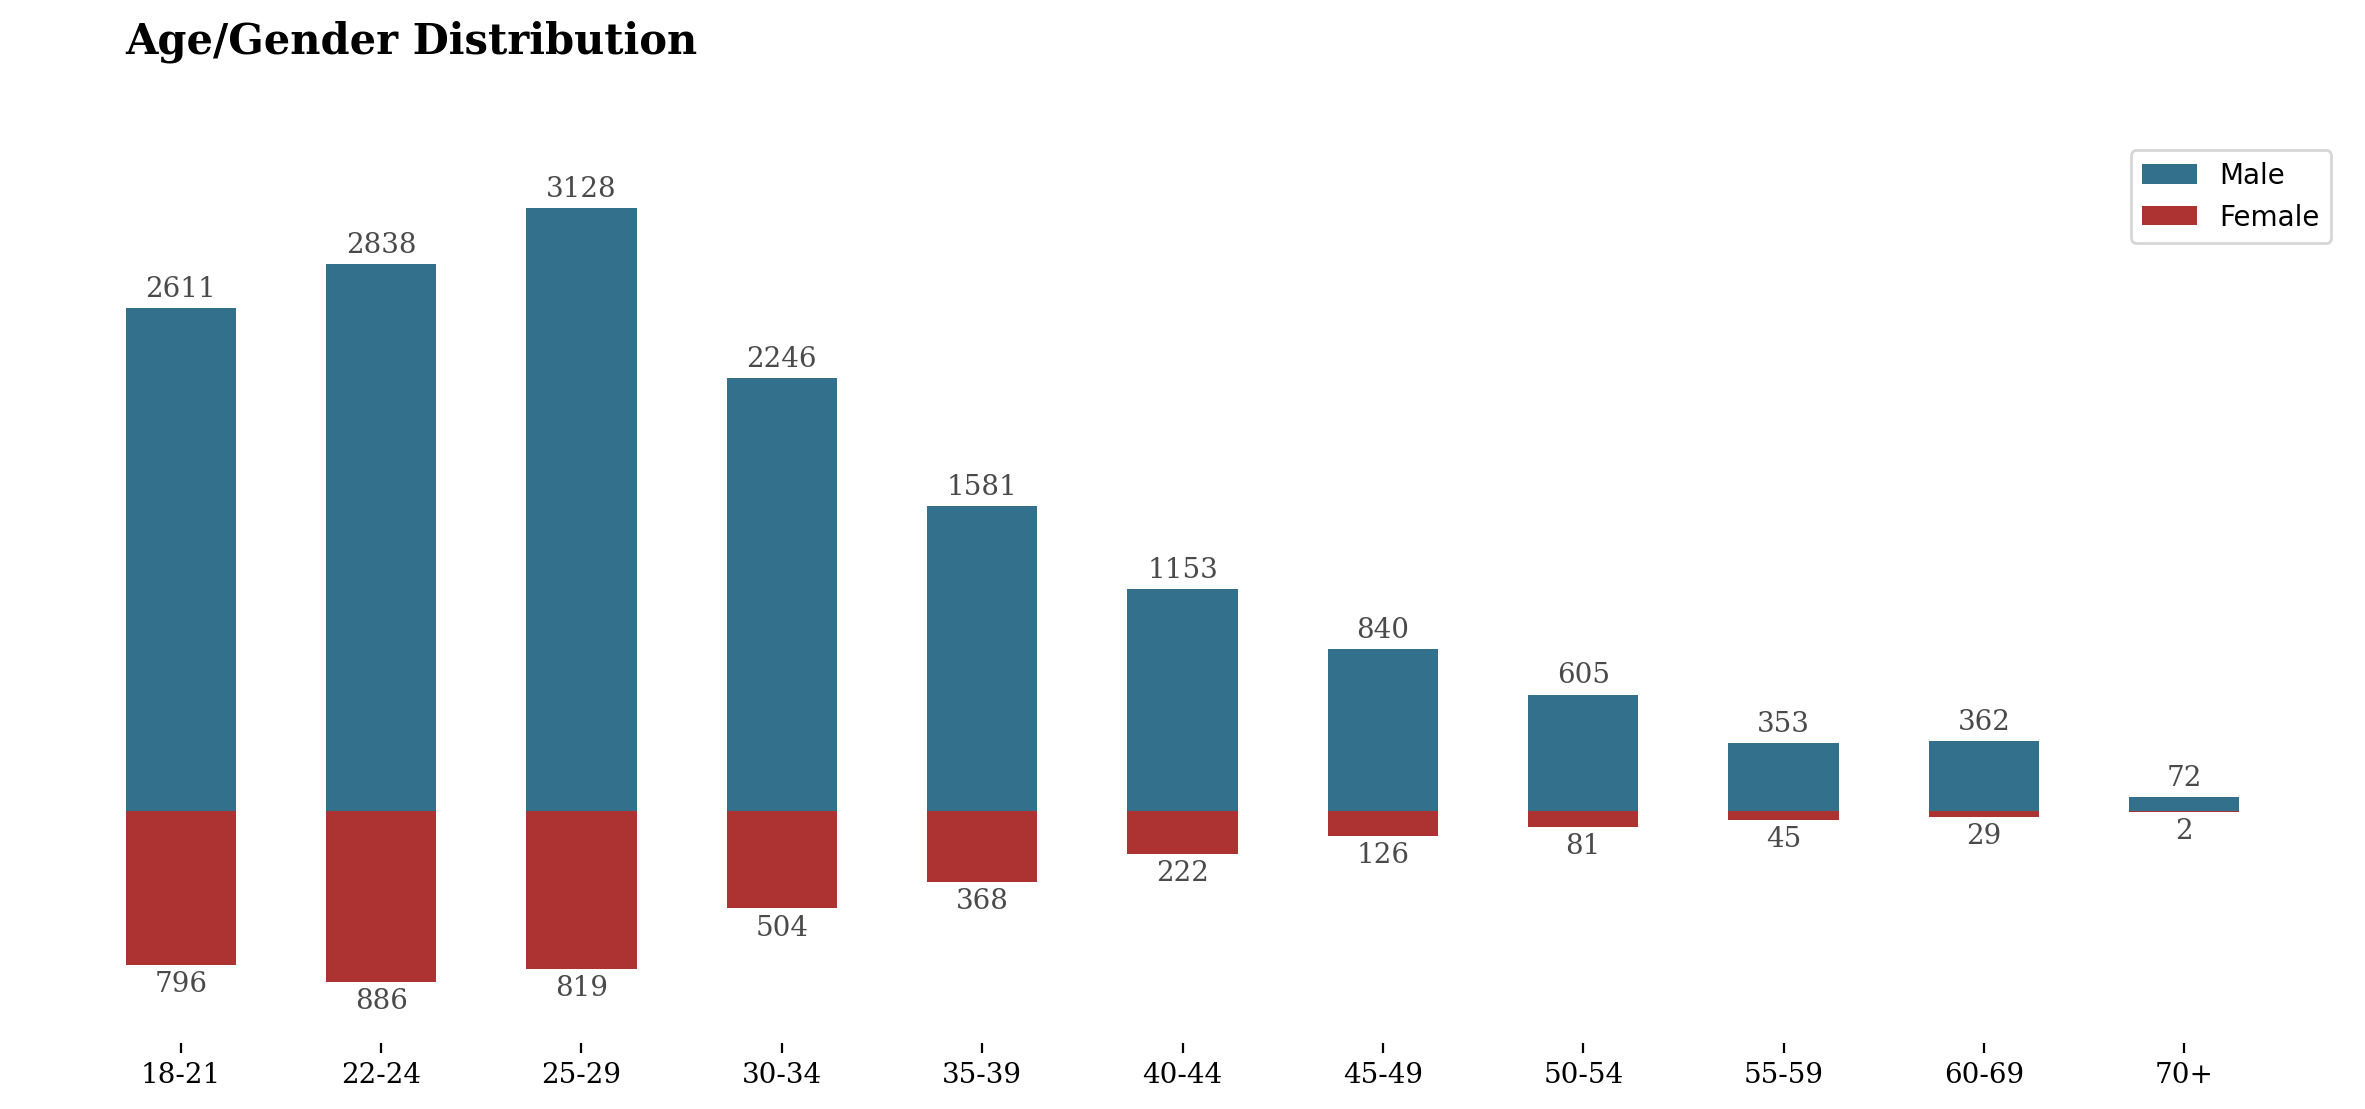

In [22]:
# Q2 data analysis 
data['Q2'] = data['Q2'].apply(lambda x : "ETC"if x not in ['Man', 'Woman'] else x)
data_q1q2 = data[data['Q2'] != 'ETC'].groupby(['Q2'])['Q1'].value_counts().unstack().sort_index()

print(data_q1q2)

man = data_q1q2.loc['Man']
woman = -data_q1q2.loc['Woman']


fig, ax = plt.subplots(1, 1, figsize=(15, 6))
ax.bar(man.index, man, width=0.55, color='#004c70', alpha=0.8, label='Male')
ax.bar(woman.index, woman, width=0.55, color = '#990000', alpha=0.8, label='Female')
ax.set_ylim(-1200, 3500)
for i in man.index :
  ax.annotate(f"{man[i]}",
              xy=(i, man[i] + 100), 
              va='center', 
              ha= 'center', 
              fontweight='light', 
              fontfamily='serif',
              color='#4a4a4a')
for i in woman.index :
  ax.annotate(f"{-woman[i]}",
              xy=(i, woman[i] - 100), 
              va='center', 
              ha= 'center', 
              fontweight='light', 
              fontfamily='serif',
              color='#4a4a4a')
  
for s in ['top', 'left', 'right', 'bottom']:
  ax.spines[s].set_visible(False)

ax.set_xticklabels(data_q1q2.columns, fontfamily='serif')
ax.set_yticks([])
ax.legend()
fig.text(0.16, 0.95, 'Age/Gender Distribution', fontsize=15, fontweight='bold', fontfamily='serif')

In [26]:
# Q2 & Q3 Gender and Country 

q3_order = data['Q3'].value_counts()[:11].drop('Other').index
print(q3_order)
data_q2q3 = data[['Q2', 'Q3']].groupby('Q3')['Q2'].value_counts().unstack().loc[q3_order]
print(data_q2q3)
data_q2q3['sum'] = data_q2q3.sum(axis=1)
data_q2q3_ratio = (data_q2q3.T / data_q2q3['sum']).T[['Man', 'Woman', 'ETC']].rename(index={'United States of America':'USA', 'United Kingdom of Great Britain and Northern Ireland':'UK'})[::-1]
print(data_q2q3_ratio)



Index(['India', 'United States of America', 'Brazil', 'Japan', 'Russia',
       'United Kingdom of Great Britain and Northern Ireland', 'Nigeria',
       'China', 'Germany', 'Turkey'],
      dtype='object')
Q2                                                   ETC     Man   Woman
India                                               71.0  4491.0  1289.0
United States of America                            74.0  1680.0   483.0
Brazil                                               2.0   599.0    93.0
Japan                                                6.0   590.0    42.0
Russia                                              11.0   491.0    80.0
United Kingdom of Great Britain and Northern Ir...  12.0   386.0    91.0
Nigeria                                              3.0   392.0    81.0
China                                               17.0   388.0    69.0
Germany                                             12.0   326.0    66.0
Turkey                                               8.0   249.

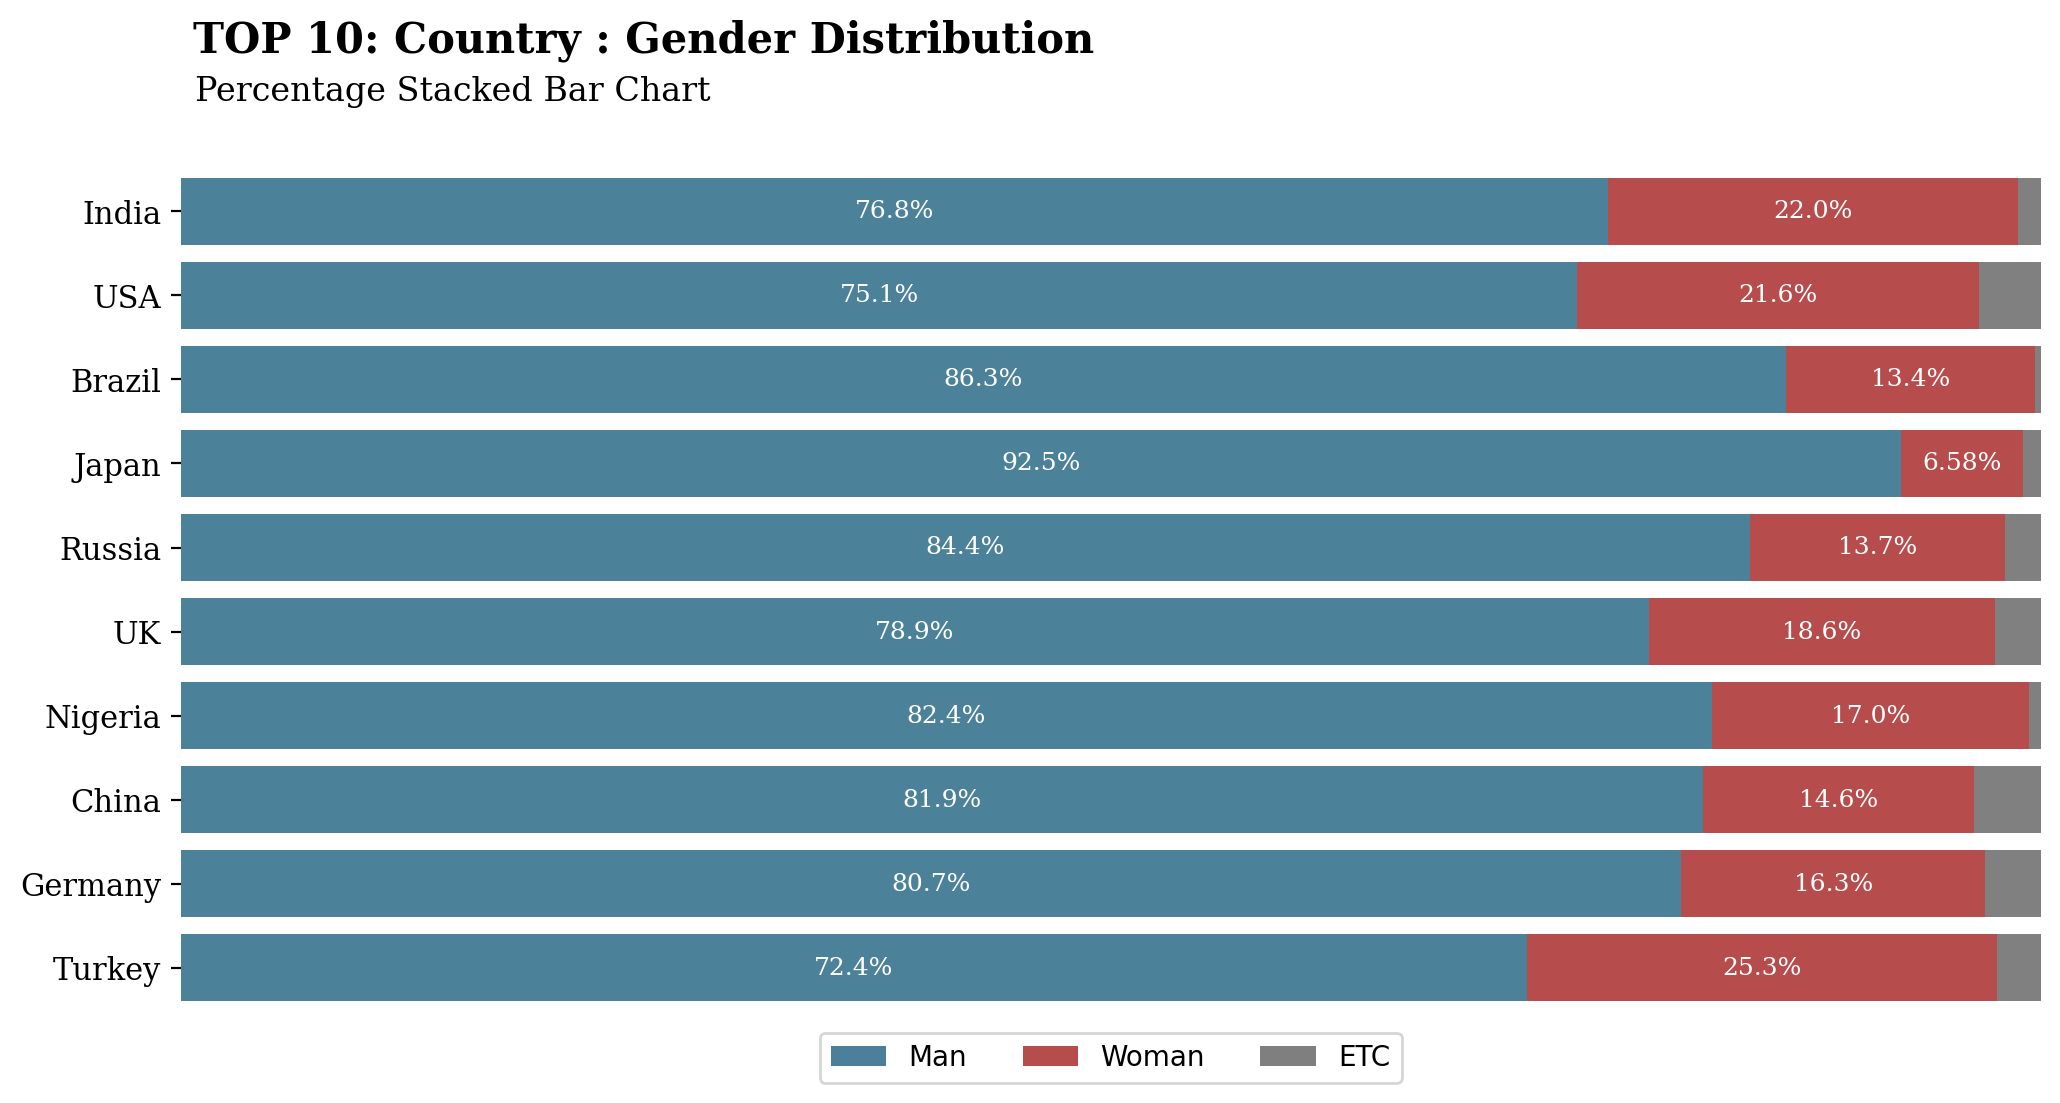

In [43]:
fig, ax = plt.subplots(1, 1, figsize = (12, 6), )
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Man'], color='#004c70', alpha=0.7, label='Man')
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Woman'], left=data_q2q3_ratio['Man'], color='#990000', alpha=0.7, label='Woman')
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['ETC'], left=data_q2q3_ratio['Woman']+data_q2q3_ratio['Man'],color='#4a4a4a' ,  alpha=0.7, label='ETC')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticklabels(data_q2q3_ratio.index, fontfamily='serif', fontsize = 11)

# male percentage 
for i in data_q2q3_ratio.index:
  ax.annotate(f"{data_q2q3_ratio['Man'][i]*100:.3}%",
              xy=(data_q2q3_ratio['Man'][i]/2, i),
              va = 'center', ha='center', fontsize=9, 
              fontweight='light', fontfamily='serif', 
              color='white')
  # female percentage 
for i in data_q2q3_ratio.index:
  ax.annotate(f"{data_q2q3_ratio['Woman'][i]*100:.3}%",
              xy=(data_q2q3_ratio['Man'][i] + data_q2q3_ratio['Woman'][i]/2, i),
              va = 'center', ha='center', fontsize=9, 
              fontweight='light', fontfamily='serif', 
              color='white')
  

fig.text(0.13, 0.95, "TOP 10: Country : Gender Distribution", fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.131, 0.91, 'Percentage Stacked Bar Chart', fontsize=12, fontfamily='serif')

for s in ['top', 'left', 'right', 'bottom']:
  ax.spines[s].set_visible(False)


ax.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.06))
plt.show()

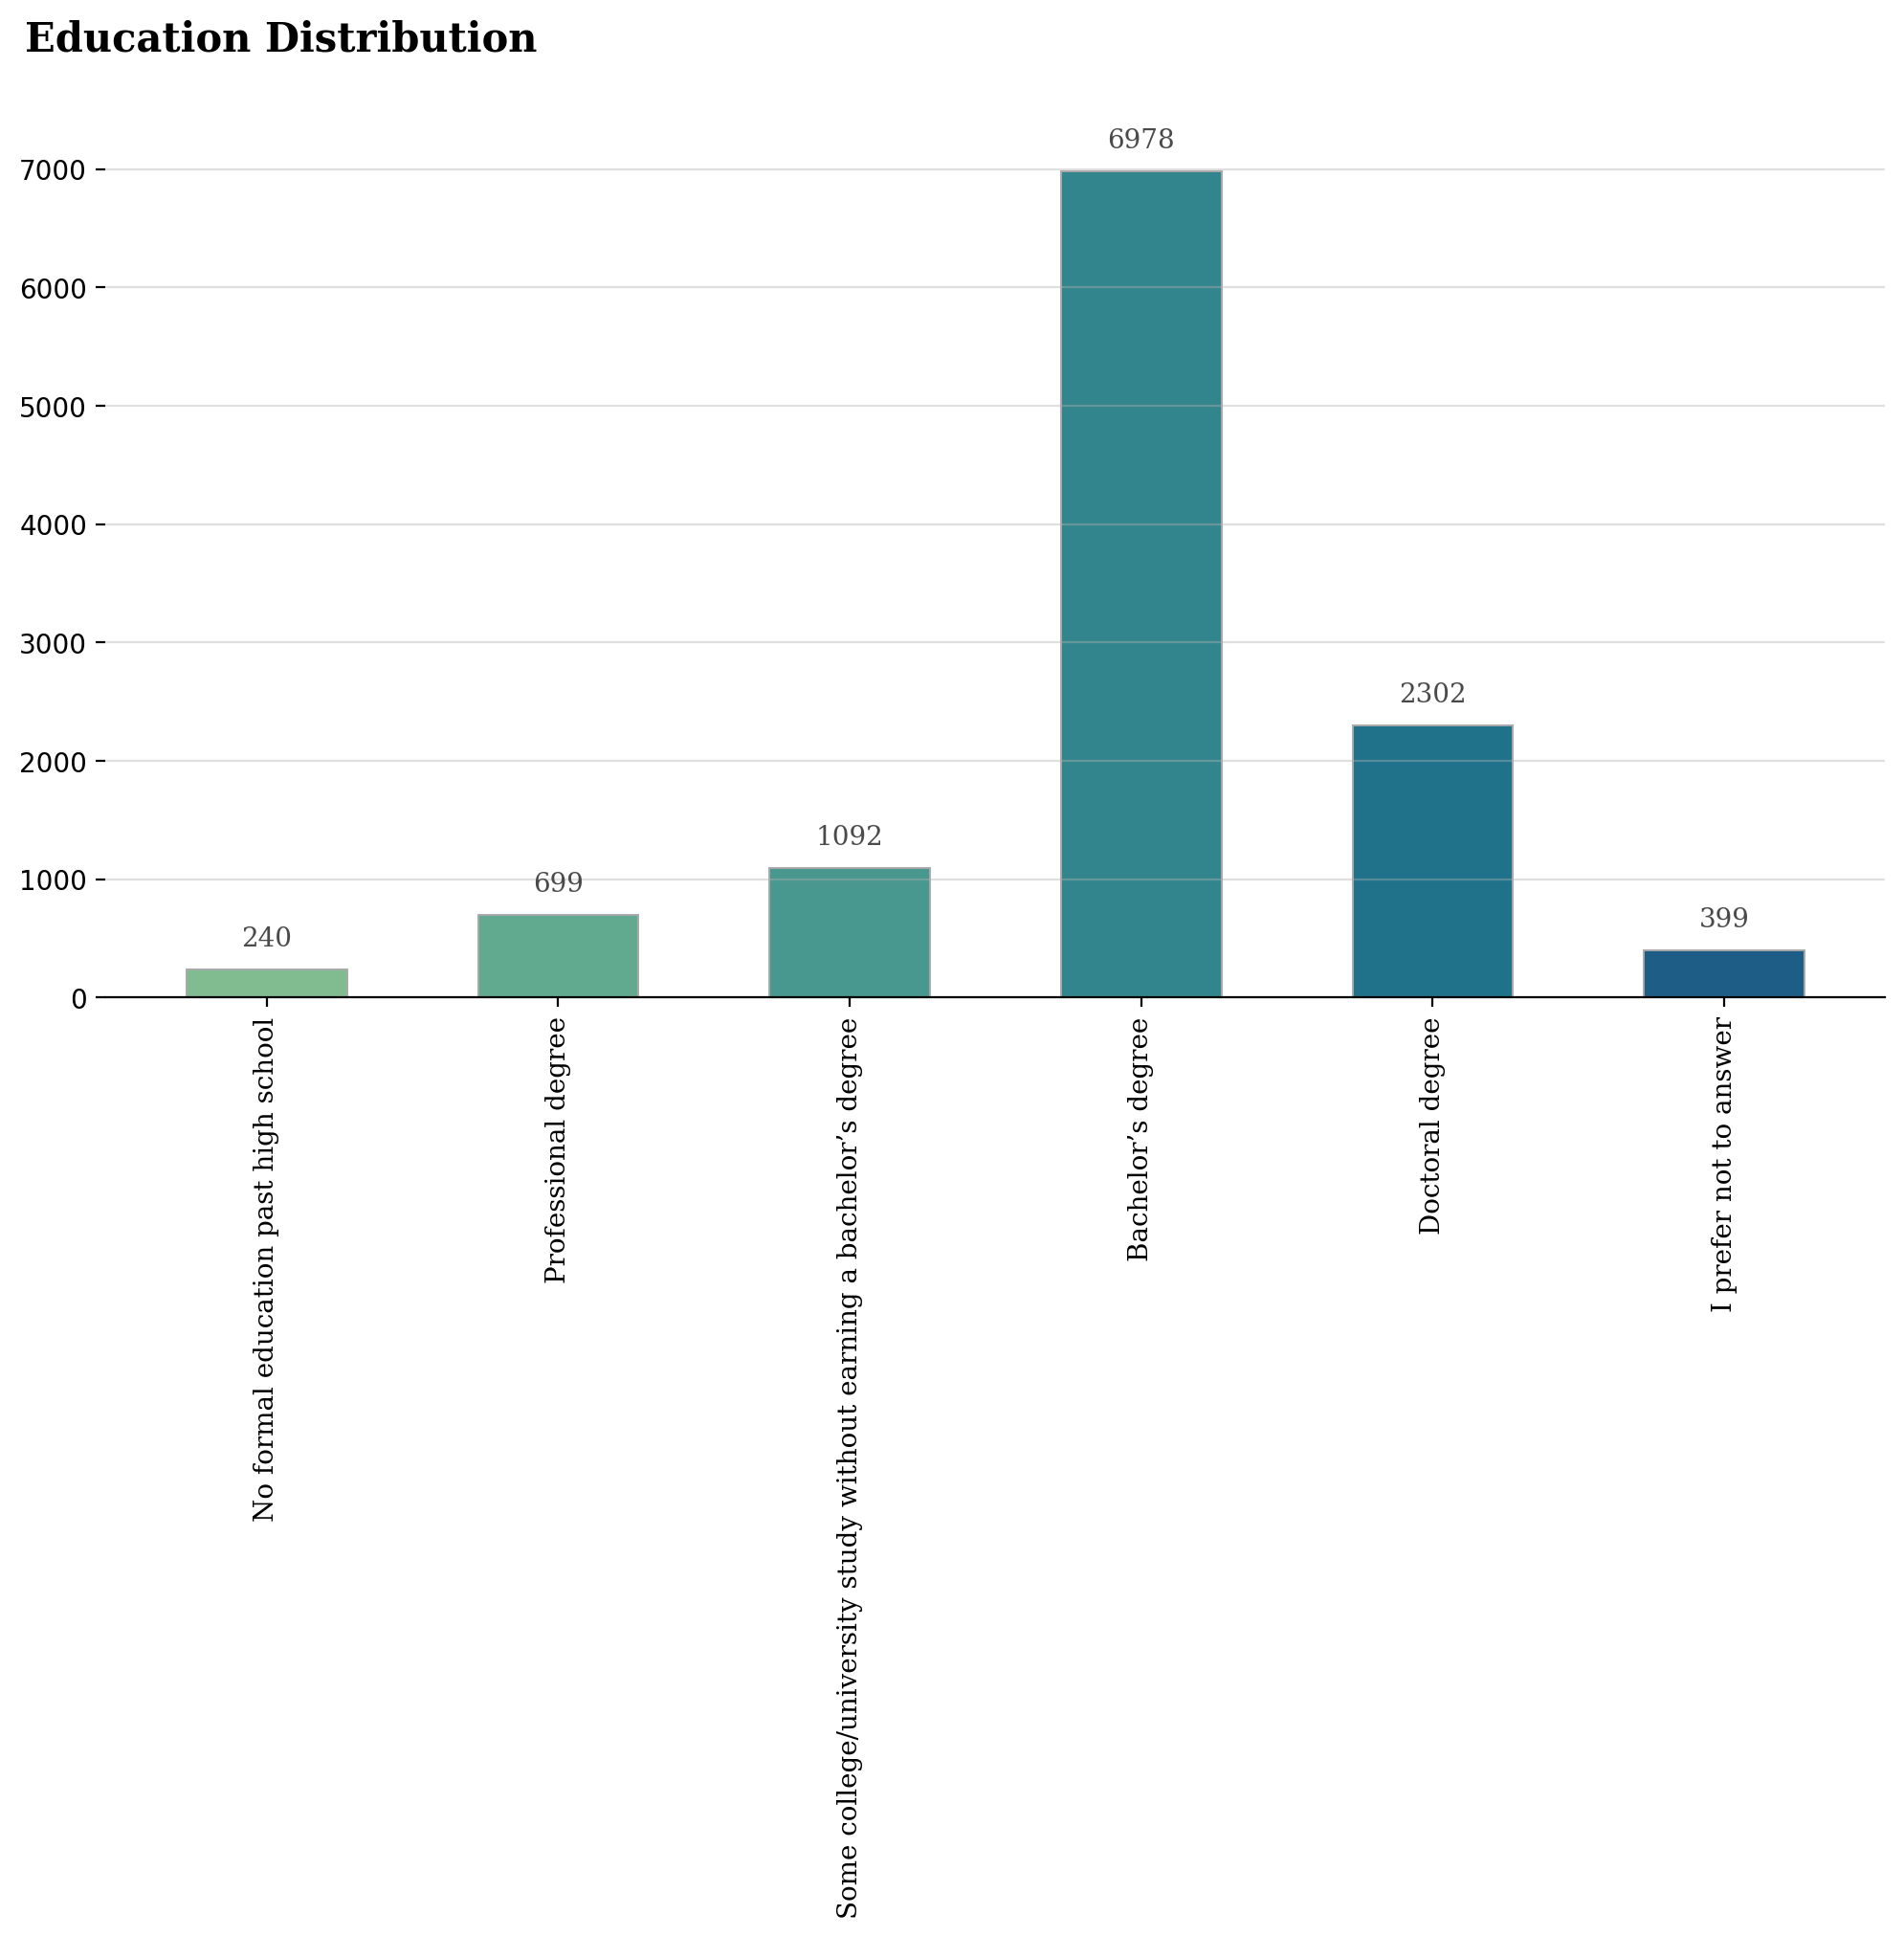

In [59]:
# Q4 & Q6

q4_order= [
           "No formal education past high school", 
           "Professional degree",
           "Some college/university study without earning a bachelor’s degree",
           "Bachelor’s degree", 
           "Doctoral degree",
           "I prefer not to answer"
]

data_q4 = data['Q4'].value_counts()[q4_order]

fig, ax = plt.subplots(1, 1,  figsize=(12, 6))

ax.bar(data_q4.index, data_q4, width=0.55, edgecolor = 'darkgray', color=sns.color_palette("crest", 7), linewidth=0.7)

for i in data_q4.index : 
  ax.annotate(f"{data_q4[i]}", 
              xy=(i, data_q4[i]+260), 
              va='center', 
              ha='center', 
              fontweight='light', 
              fontfamily='serif', 
              color='#4a4a4a')
  
for s in ['top', 'left', 'right']:
  ax.spines[s].set_visible(False)

ax.set_xticklabels(data_q4.index, fontfamily='serif', rotation=90)
fig.text(0.09, 0.95, "Education Distribution", fontsize=15, fontweight='bold', fontfamily='serif')

ax.grid(axis='y', linestyle='-', alpha=0.4)
plt.show()
  

array(['Doctoral degree', 'Master’s degree', 'Bachelor’s degree',
       'No formal education past high school',
       'Some college/university study without earning a bachelor’s degree',
       'Professional degree', 'I prefer not to answer', nan], dtype=object)